In [36]:
!git clone https://github.com/sunljlzu/lzu18li_1.git

Cloning into 'lzu18li_1'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 97 (delta 0), reused 0 (delta 0), pack-reused 93
Unpacking objects: 100% (97/97), done.


In [0]:
from lzu18li_1 import DE
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [0]:
df1 = df.sample(170)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 261.87:   7%|▋         | 14010/200000 [00:15<03:19, 934.46it/s]
Convergence achieved at 14100
Interrupted at 14,099 [7%]: Average Loss = 273.94
INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.8-64/lock_dir/lock
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, lambda, tau, beta, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:50<00:00, 59.31draws/s]
There were 81 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9383652503011118, but should be close to 0.8. Try to increase the number of tuning steps.
There were 177 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7209234825769496, but should be close to 0.8. Try to increase the number of tuning steps.
T

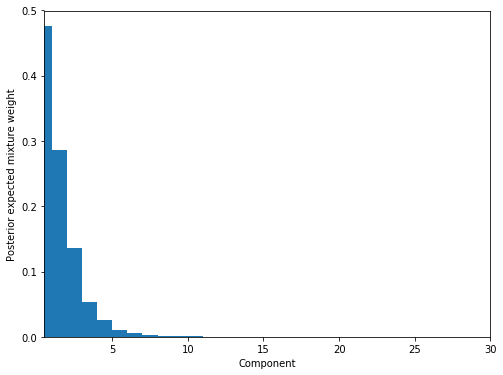

In [42]:
x = df1.median_house_value
x = (x - x.mean()) / x.std()
x = x.values
post_pdfs = DE.density(x)

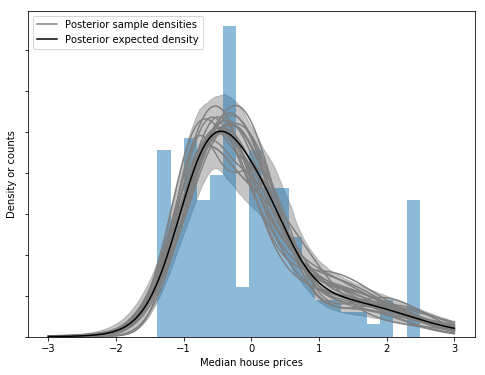

In [45]:
post_pdf_low, post_pdf_high = np.percentile(post_pdfs, [2.5, 97.5], axis=0)

fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
x_plot = np.linspace(-3,3,200)
ax.hist(x, bins=n_bins, density=True, lw=0, alpha=0.5);

ax.fill_between(x_plot, post_pdf_low, post_pdf_high,
                color='gray', alpha=0.45);
ax.plot(x_plot, post_pdfs[0],
        c='gray', label='Posterior sample densities');
ax.plot(x_plot, post_pdfs[::100].T, c='gray');
ax.plot(x_plot, post_pdfs.mean(axis=0),
        c='k', label='Posterior expected density');

ax.set_xlabel('Median house prices');

ax.set_yticklabels([]);
ax.set_ylabel('Density');

ax.legend(loc=2);